In [3]:
using ControlSystems;
using DifferentialEquations;
using PyPlot;
using Polynomials;

In [4]:
A=[-2 1 0;0 -2 0;0 0 4];
B=[0;1;1];
C=[1 0 0;0 0 1];
D=0.0;
sys=ss(A,B,C,D,0);

In [5]:
eigvals(A)

3-element Array{Float64,1}:
 -2.0
 -2.0
  4.0

In [7]:
rank(ctrb(sys))

3

In [8]:
rank(obsv(sys))

3

In [6]:
u(x,t)=[0.0 0.0 0.0]*x;
x0=[1.0;1.0;1.0];
tspan=0:0.01:10;
y, t, x, uout = lsim(sys,u,tspan,x0=x0);

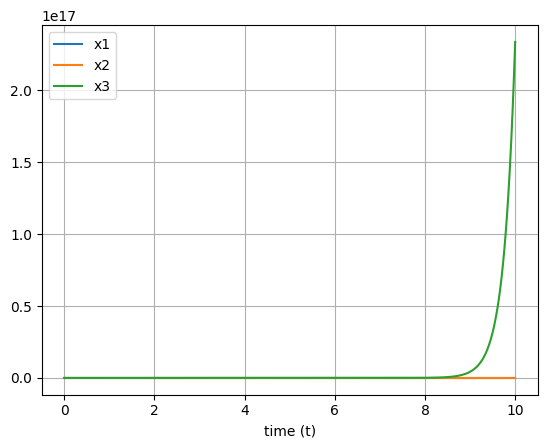

In [86]:
plot(t,x[:,1],label="x1")
plot(t,x[:,2],label="x2")
plot(t,x[:,3],label="x3")
xlabel("time (t)")
legend()
grid(true)

In [9]:
v1=nullspace([-2*eye(3)-sys.A sys.B])
v2=nullspace([-3*eye(3)-sys.A sys.B]);
v3=nullspace([-4*eye(3)-sys.A sys.B]);

In [10]:
K=[v1[4,1] v2[4,1] v3[4,1]]*inv([v1[1:3,1] v2[1:3,1] v3[1:3,1]])

1×3 Array{Float64,2}:
 0.0  -0.333333  9.33333

In [11]:
sys_new=sys.A-sys.B*K

3×3 Array{Float64,2}:
 -2.0   1.0        0.0    
  0.0  -1.66667   -9.33333
  0.0   0.333333  -5.33333

In [12]:
u(x,t)=-K*x;
y, t, x, uout = lsim(sys,u,tspan,x0=x0);

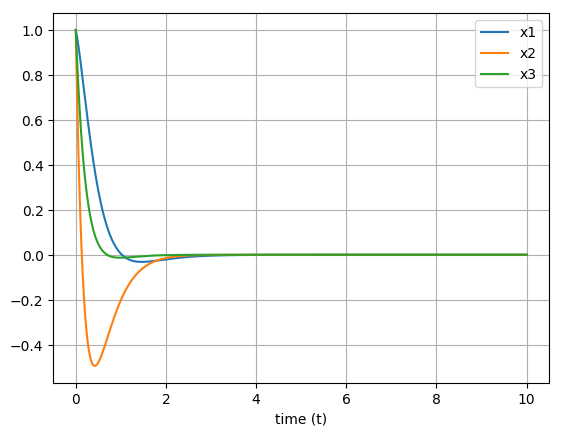

In [13]:
plot(t,x[:,1],label="x1")
plot(t,x[:,2],label="x2")
plot(t,x[:,3],label="x3")
xlabel("time (t)")
legend()
grid(true)

In [15]:
eigvals(sys_new)

3-element Array{Float64,1}:
 -2.0
 -3.0
 -4.0

In [16]:
K1=place(sys,[-2,-3,-4])

1×3 Array{Float64,2}:
 2.66667  -4.22222  30.2222

In [60]:
mutable struct Param
    A::Array{Float64,2}
    B::Array{Float64,1}
    C::Array{Float64,2}
    D::Float64
    K::Array{Float64,2}
    L::Array{Float64,2}
end

In [61]:
#K=[0.0 0.0 0.0 0.0];
#L=[0.0 0.0;0.0 0.0;0.0 0.0;0.0 0.0];
param= Param(A,B,C,D,K,L);

In [62]:
function f!(dx,x,param,t)
    A=param.A;
    B=param.B;
    K=param.K;
    L=param.L;
    
    xtrue=x[1:3];
    xhat=x[4:6];
    u=-K*xhat;
    
    # observer    
    temp_hat=A*xhat+B*u[1]+L*C*(xhat-xtrue);
    
    dx[4]=temp_hat[1];
    dx[5]=temp_hat[2];
    dx[6]=temp_hat[3];
    
    # true physical system
    temp_true=A*xtrue+B*u[1];  

    dx[1]=temp_true[1];
    dx[2]=temp_true[2];
    dx[3]=temp_true[3];

end;

In [14]:
v1=nullspace([-10*eye(3)-sys.A' sys.C'])
v2=nullspace([-15*eye(3)-sys.A' sys.C'])
v3=nullspace([-20*eye(3)-sys.A' sys.C'])

L=[v1[4:5] v2[4:5] v3[9:10]]*inv([v1[1:3] v2[1:3] v3[6:8]])
L=L';
eigvals(A-L*C)

3-element Array{Float64,1}:
 -15.0
 -10.0
 -20.0

In [15]:
L=[v1[4:5] v2[4:5] v3[9:10]]*inv([v1[1:3] v2[1:3] v3[6:8]])

2×3 Array{Float64,2}:
 21.0  104.0   0.0
  0.0    0.0  24.0

In [64]:
param.C=C;
param.K=K;
param.L=-L;

In [77]:
x0=[1.0,1.0,1.0,0.5,0.5,0.5];
prob=ODEProblem(f!,x0,(0.0,10.0),param);
sol=solve(prob,Tsit5(),dtmax=0.01);

In [78]:
n=length(sol.t)

1002

In [79]:
n=length(sol.t);
x1=zeros(n); [x1[i]=sol.u[i][1] for i=1:n];
x2=zeros(n); [x2[i]=sol.u[i][2] for i=1:n];
x3=zeros(n); [x3[i]=sol.u[i][3] for i=1:n];

x1_hat=zeros(n); [x1_hat[i]=sol.u[i][4] for i=1:n];
x2_hat=zeros(n); [x2_hat[i]=sol.u[i][5] for i=1:n];
x3_hat=zeros(n); [x3_hat[i]=sol.u[i][6] for i=1:n];


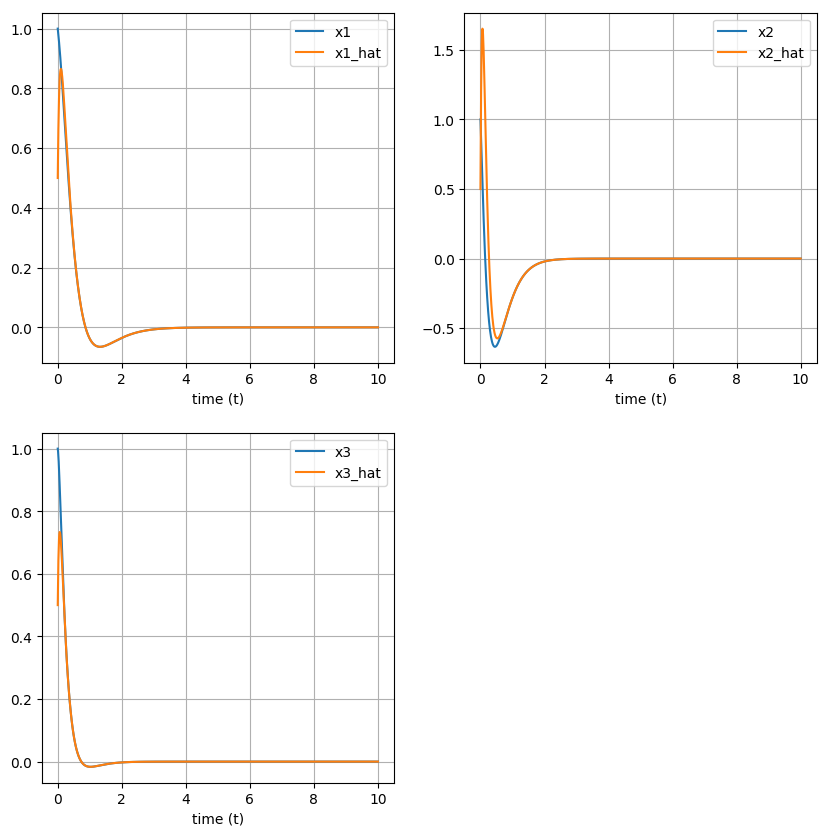

In [80]:
figure(figsize=(10,10))
subplot(221)
plot(sol.t,x1,label="x1")
plot(sol.t,x1_hat,label="x1_hat")
xlabel("time (t)")
legend()
grid(true)
subplot(222)
plot(sol.t,x2,label="x2")
plot(sol.t,x2_hat,label="x2_hat")
xlabel("time (t)")
legend()
grid(true)
subplot(223)
plot(sol.t,x3,label="x3")
plot(sol.t,x3_hat,label="x3_hat")
xlabel("time (t)")
legend()
grid(true)
